In [1]:
# @author- Shivam Thassu

# Importing librarias required for project 
# Ready to go 

import pandas as pd #for dataframes
import numpy as np
import matplotlib.pyplot as plt #for plots
import seaborn as sns #for vizualisations
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import matplotlib.dates as md

In [2]:
# Read multiple datasets downloaded from "http://opendata.dc.gov/datasets?q=crime&sort=name&t=crime"
# and store them each as individual Pandas DataFrames

crime2008 = pd.read_csv('C:\ProgramData\Anaconda3\My files\Crime_Incidents_in_2008.csv')
crime2009 = pd.read_csv('C:\ProgramData\Anaconda3\My files\Crime_Incidents_in_2009.csv')
crime2010 = pd.read_csv('C:\ProgramData\Anaconda3\My files\Crime_Incidents_in_2010.csv')
crime2011 = pd.read_csv('C:\ProgramData\Anaconda3\My files\Crime_Incidents_in_2011.csv')
crime2012 = pd.read_csv('C:\ProgramData\Anaconda3\My files\Crime_Incidents_in_2012.csv')
crime2013 = pd.read_csv('C:\ProgramData\Anaconda3\My files\Crime_Incidents_in_2013.csv')
crime2014 = pd.read_csv('C:\ProgramData\Anaconda3\My files\Crime_Incidents_in_2014.csv')
crime2015 = pd.read_csv('C:\ProgramData\Anaconda3\My files\Crime_Incidents_in_2015.csv')
crime2016 = pd.read_csv('C:\ProgramData\Anaconda3\My files\Crime_Incidents_in_2016.csv')
crime2017 = pd.read_csv('C:\ProgramData\Anaconda3\My files\Crime_Incidents_in_2017.csv')

In [3]:
# Concatenate the individual dataframes into one large dataframe called "DC_crimes"

frames = [crime2008, crime2009, crime2010, crime2011, crime2012, crime2013, crime2014, crime2015, crime2016, crime2017]
DC_crimes = pd.concat(frames)

In [4]:
# Checking number of rows and columns

DC_crimes.shape

(345263, 26)

In [5]:
# Checking the structure 

crime2017.head()

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,WARD,ANC,DISTRICT,PSA,NEIGHBORHOOD_CLUSTER,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,XCOORD,YCOORD,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID
0,-77.024644,38.917001,17151322,2017-09-01T13:45:31.000Z,DAY,OTHERS,THEFT/OTHER,900 - 931 BLOCK OF U STREET NW,397863.0,138792.0,1,1B,3.0,305.0,Cluster 3,004400 2,4400.0,Precinct 137,397899.41,138773.80,38.916993,-77.024642,NaN,2017-09-01T00:01:02.000Z,2017-09-01T01:00:20.000Z,96936385
1,-77.001409,38.907545,17151338,2017-09-01T14:32:00.000Z,DAY,GUN,ROBBERY,300 - 385 BLOCK OF FLORIDA AVENUE NE,399878.0,137742.0,6,6C,5.0,501.0,NaN,010600 2,10600.0,Precinct 83,399873.08,137777.66,38.907537,-77.001407,NOMA,2017-09-01T13:10:42.000Z,2017-09-01T13:15:07.000Z,96936386
2,-76.998194,38.844117,17151357,2017-09-01T15:14:26.000Z,EVENING,OTHERS,THEFT/OTHER,3026 3099 BLOCK OF MARTIN LUTHER KING JR AVEN...,400157.0,130701.0,8,8C,7.0,707.0,Cluster 39,010400 1,10400.0,Precinct 123,400144.92,130737.57,38.844109,-76.998191,NaN,2017-09-01T14:47:58.000Z,2017-09-01T15:14:26.000Z,96936387
3,-76.984676,38.924975,17151391,2017-09-01T16:23:22.000Z,EVENING,OTHERS,THEFT/OTHER,1400 - 1499 BLOCK OF RHODE ISLAND AVENUE NE,401329.0,139677.0,5,5C,5.0,504.0,Cluster 22,009102 1,9102.0,Precinct 72,401275.16,139692.48,38.924967,-76.984674,NaN,2017-09-01T16:12:33.000Z,2017-09-01T16:23:18.000Z,96936388
4,-76.956153,38.893565,17151447,2017-09-02T00:46:40.000Z,MIDNIGHT,OTHERS,THEFT/OTHER,3424 - 3455 BLOCK OF CLAY STREET NE,403804.0,136191.0,7,7D,6.0,603.0,Cluster 32,009604 1,9604.0,Precinct 101,403777.42,136168.29,38.893557,-76.956151,NaN,2017-09-01T15:30:04.000Z,2017-09-01T15:45:05.000Z,96936389


In [6]:
# Data cleaning and removing columns which are not essential

DC_crimes.drop(['X', 'Y', 'CCN','BLOCK','XBLOCK','YBLOCK','ANC','DISTRICT','PSA','BLOCK_GROUP',
                'CENSUS_TRACT','VOTING_PRECINCT','XCOORD','YCOORD','BID','START_DATE','END_DATE','OBJECTID'],axis=1,inplace=True)

In [7]:
# Convert the "REPORT_DAT" column into a pandas DateTime Index

DC_crimes['REPORT_DAT'] =  pd.to_datetime(DC_crimes['REPORT_DAT'], infer_datetime_format=True)

# Sort the new dataframe by "REPORT_DAT"

DC_crimes.sort_values(by='REPORT_DAT',inplace=True)

In [8]:
DC_crimes.head()

,REPORT_DAT,SHIFT,METHOD,OFFENSE,WARD,NEIGHBORHOOD_CLUSTER,LATITUDE,LONGITUDE
26956,2008-01-01 00:58:00,MIDNIGHT,OTHERS,ROBBERY,4.0,Cluster 17,38.982123,-77.024468
2221,2008-01-01 02:00:00,MIDNIGHT,OTHERS,ASSAULT W/DANGEROUS WEAPON,4.0,Cluster 18,38.959674,-77.028141
26957,2008-01-01 02:10:00,MIDNIGHT,OTHERS,BURGLARY,1.0,Cluster 2,38.932365,-77.042801
2223,2008-01-01 02:50:00,MIDNIGHT,GUN,ROBBERY,2.0,Cluster 8,38.898310,-77.024958
2225,2008-01-01 02:55:00,MIDNIGHT,KNIFE,ASSAULT W/DANGEROUS WEAPON,2.0,Cluster 8,38.905647,-77.027037


In [9]:
# create a new column to store the result of "WEEK_DAY" parsed from the pandas datetime object  
DC_crimes['WEEK_DAY'] = DC_crimes.REPORT_DAT.dt.weekday_name

# create a new column to store the result of "MONTH" parsed from the pandas datetime object  
DC_crimes['MONTH'] = DC_crimes.REPORT_DAT.dt.month

# create a new column to store the result of "YEAR" parsed from the pandas datetime object  
DC_crimes['YEAR'] = DC_crimes.REPORT_DAT.dt.year

# create a new column to store the result of "TIME" parsed from the pandas datetime object  
DC_crimes['TIME'] = DC_crimes.REPORT_DAT.dt.time

# create a new column to store the result of "HOUR" parsed from the pandas datetime object  
DC_crimes['HOUR'] = DC_crimes.REPORT_DAT.dt.hour

In [10]:
DC_crimes.head()

,REPORT_DAT,SHIFT,METHOD,OFFENSE,WARD,NEIGHBORHOOD_CLUSTER,LATITUDE,LONGITUDE,WEEK_DAY,MONTH,YEAR,TIME,HOUR
26956,2008-01-01 00:58:00,MIDNIGHT,OTHERS,ROBBERY,4.0,Cluster 17,38.982123,-77.024468,Tuesday,1,2008,00:58:00,0
2221,2008-01-01 02:00:00,MIDNIGHT,OTHERS,ASSAULT W/DANGEROUS WEAPON,4.0,Cluster 18,38.959674,-77.028141,Tuesday,1,2008,02:00:00,2
26957,2008-01-01 02:10:00,MIDNIGHT,OTHERS,BURGLARY,1.0,Cluster 2,38.932365,-77.042801,Tuesday,1,2008,02:10:00,2
2223,2008-01-01 02:50:00,MIDNIGHT,GUN,ROBBERY,2.0,Cluster 8,38.898310,-77.024958,Tuesday,1,2008,02:50:00,2
2225,2008-01-01 02:55:00,MIDNIGHT,KNIFE,ASSAULT W/DANGEROUS WEAPON,2.0,Cluster 8,38.905647,-77.027037,Tuesday,1,2008,02:55:00,2


In [11]:
# Store total count of each type of offenses for each year

crime_types = DC_crimes.groupby(["OFFENSE","YEAR"]).count().iloc[:,:1].unstack()
crime_types.columns = crime_types.columns.droplevel(0)
crime_types.columns = ["2008","2009","2010","2011","2012","2013","2014","2015","2016","2017"]
crime_types

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
OFFENSE,,,,,,,,,,
ARSON,61.0,52.0,47.0,44.0,34.0,35.0,26.0,18.0,6.0,4.0
ASSAULT W/DANGEROUS WEAPON,2920.0,2428.0,2334.0,2248.0,2362.0,2392.0,2464.0,2387.0,2270.0,1747.0
BURGLARY,3777.0,3488.0,4060.0,3859.0,3616.0,3354.0,3178.0,2536.0,2122.0,1433.0
HOMICIDE,178.0,132.0,126.0,107.0,89.0,104.0,105.0,160.0,136.0,105.0
MOTOR VEHICLE THEFT,5376.0,4456.0,3761.0,3282.0,2834.0,2665.0,3119.0,2906.0,2692.0,2250.0
ROBBERY,4152.0,3719.0,3673.0,3935.0,4202.0,3986.0,3277.0,3347.0,2972.0,2042.0
SEX ABUSE,136.0,114.0,156.0,176.0,271.0,298.0,317.0,331.0,347.0,271.0
THEFT F/AUTO,NaN,4121.0,8157.0,9427.0,9767.0,10170.0,11330.0,11351.0,12138.0,9615.0
THEFT/OTHER,17580.0,12670.0,9267.0,10135.0,12099.0,12852.0,14592.0,14244.0,14517.0,13624.0


In [12]:
DC_crimes_total = crime_types.sum(axis =1)
DC_crimes_total

OFFENSE
ARSON                            327.0
ASSAULT W/DANGEROUS WEAPON     23552.0
BURGLARY                       31423.0
HOMICIDE                        1242.0
MOTOR VEHICLE THEFT            33341.0
ROBBERY                        35305.0
SEX ABUSE                       2417.0
THEFT F/AUTO                   86076.0
THEFT/OTHER                   131580.0
dtype: float64

In [13]:
DC_crimes_total = pd.DataFrame(crime_types.sum(axis =1))
DC_crimes_total.columns = ["Count"]
DC_crimes_total.sort_values(by="Count", ascending=False, inplace=True)

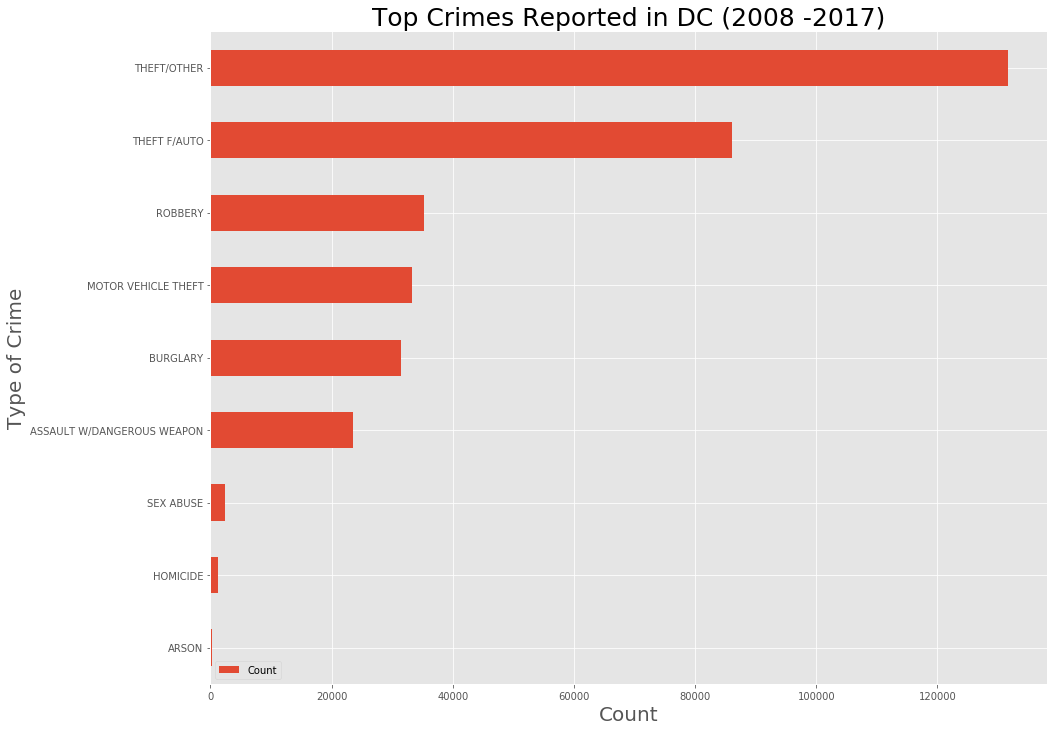

In [14]:
# Plot the bar graph for the Top Crimes in DC

DC_crimes_total.plot(kind='barh', figsize=(15,12)).invert_yaxis()
plt.title('Top Crimes Reported in DC (2008 -2017)', fontsize=25)
plt.ylabel('Type of Crime', fontsize=20)
plt.xlabel('Count', fontsize=20)
plt.show()


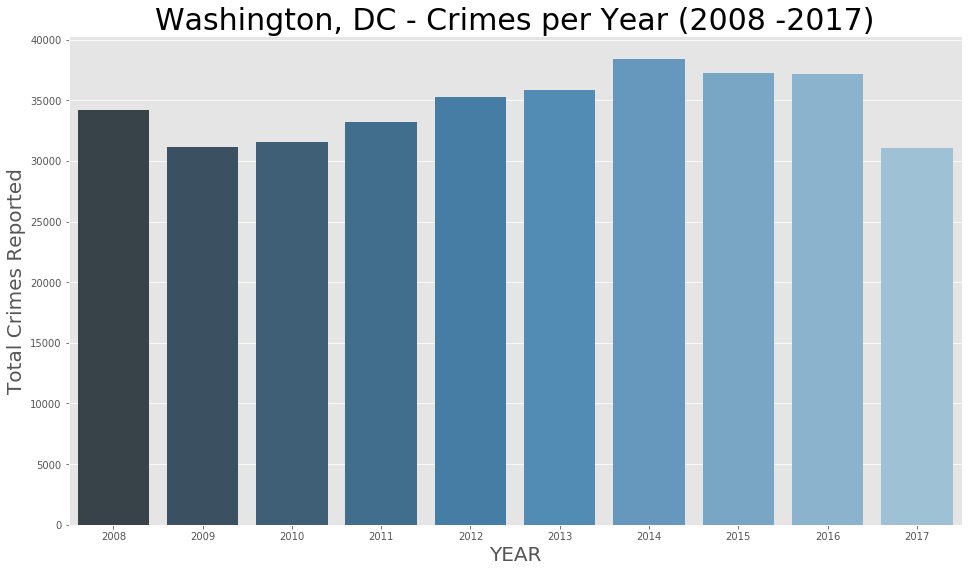

In [15]:
# Lets look at the total crimes per year
# Plot total count of crimes by year

plt.figure(figsize=(16,9))
sns.countplot(DC_crimes.YEAR, palette = "Blues_d")
plt.title('Washington, DC - Crimes per Year (2008 -2017)', fontsize=30)
plt.ylabel('Total Crimes Reported',fontsize=20)
plt.xlabel('YEAR',fontsize=20) 

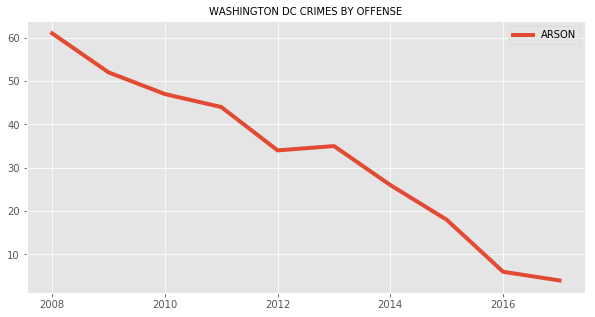

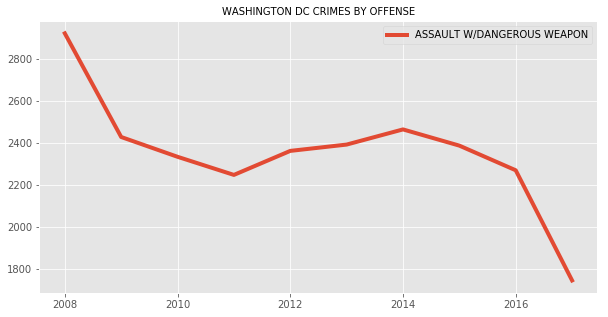

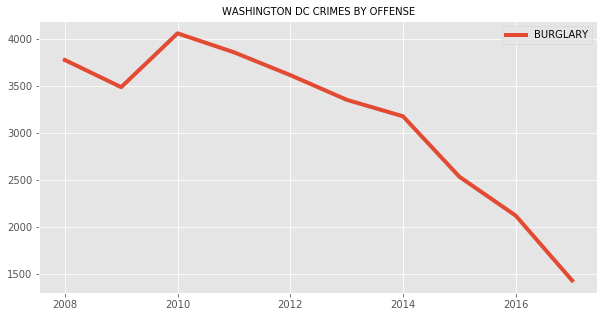

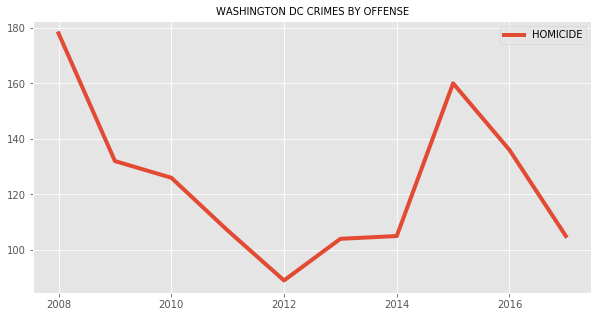

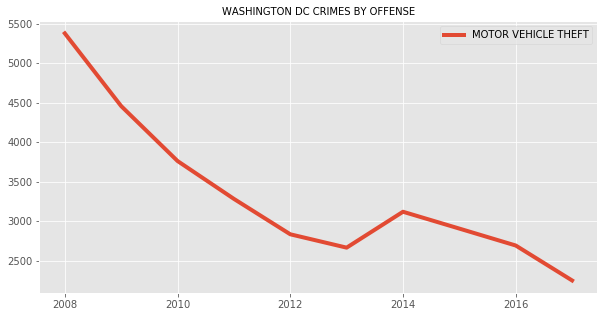

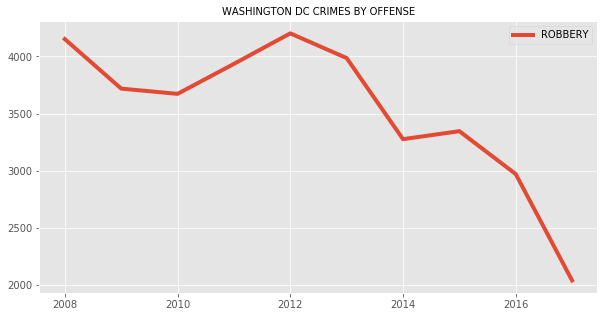

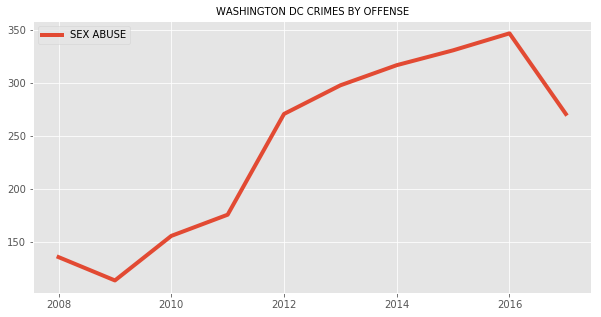

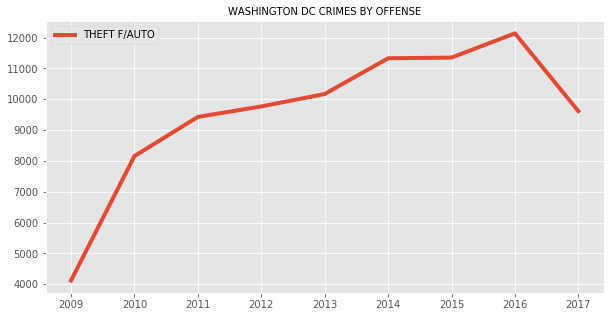

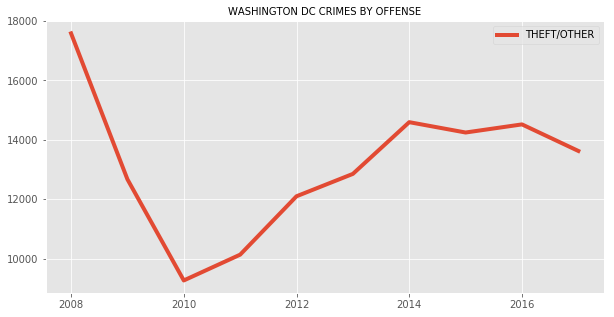

In [17]:
# Plot each type of crimes by year and analyze the trends

for i in range(9):
    plt.figure(figsize=(10,5))
    plt.plot(crime_types.iloc[i],lw=4)
    plt.legend(fontsize=10)
    plt.title('WASHINGTON DC CRIMES BY OFFENSE',fontsize=10)

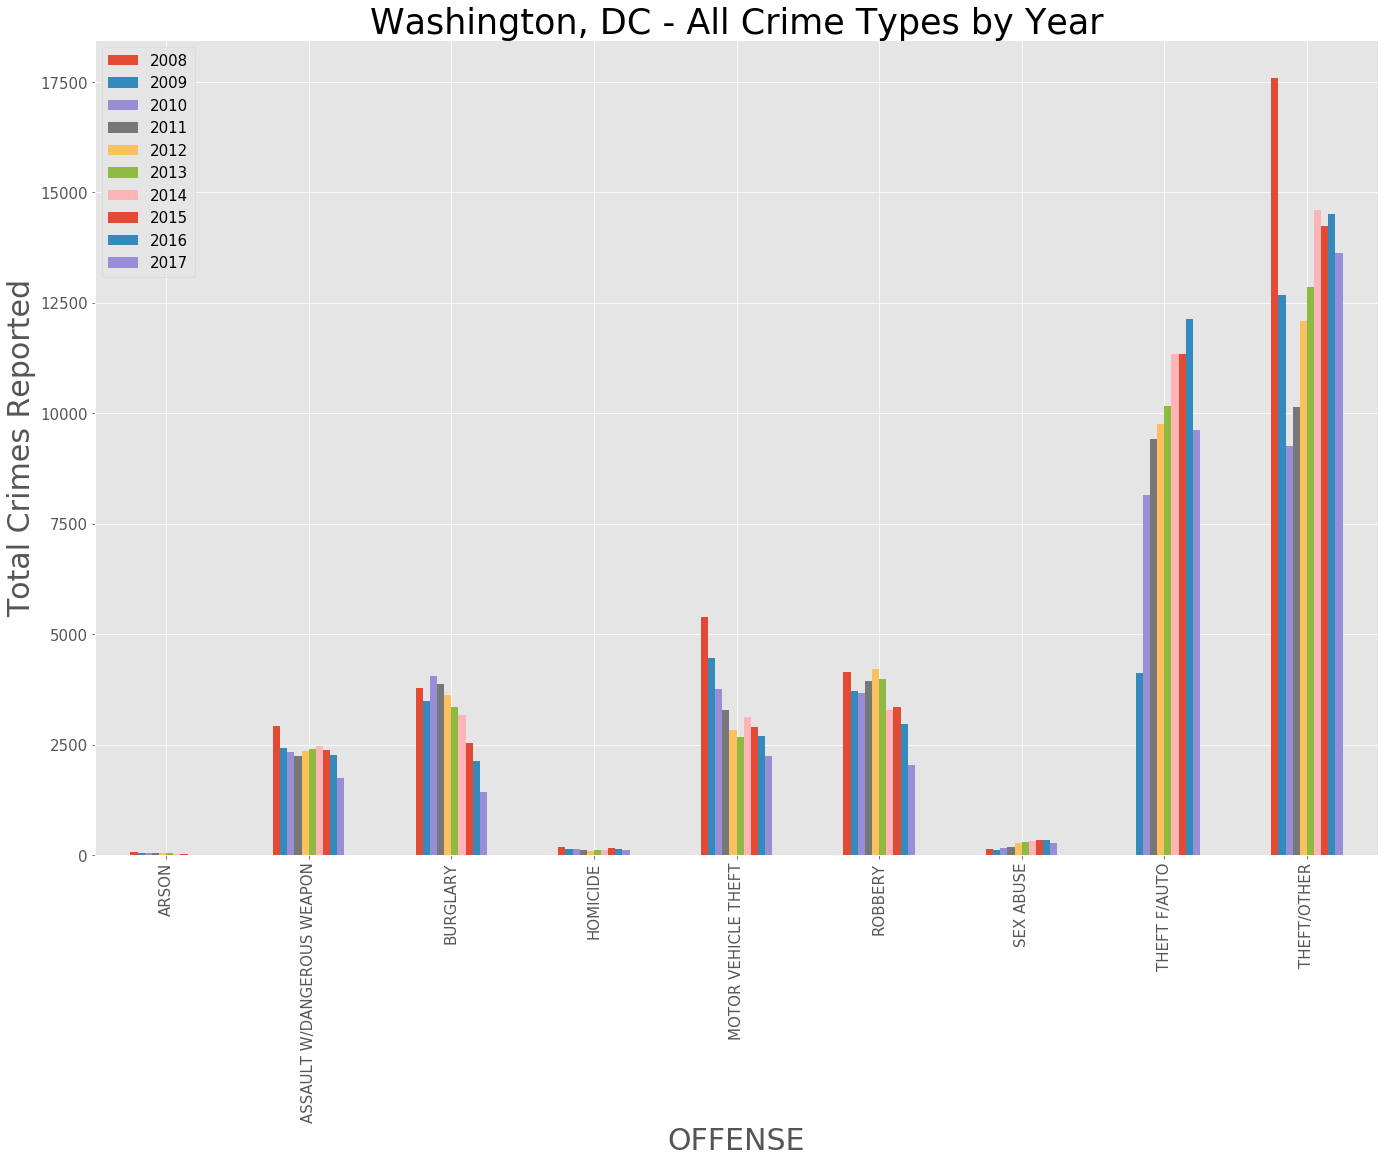

In [19]:
#plot total crimes reported by OFFENSE 

l = crime_types.plot(kind='bar',figsize=(23,15))
l.legend(fontsize=15)
plt.title('Washington, DC - All Crime Types by Year', fontsize=35)
plt.ylabel('Total Crimes Reported',fontsize=30)
plt.xlabel('OFFENSE',fontsize=30)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 

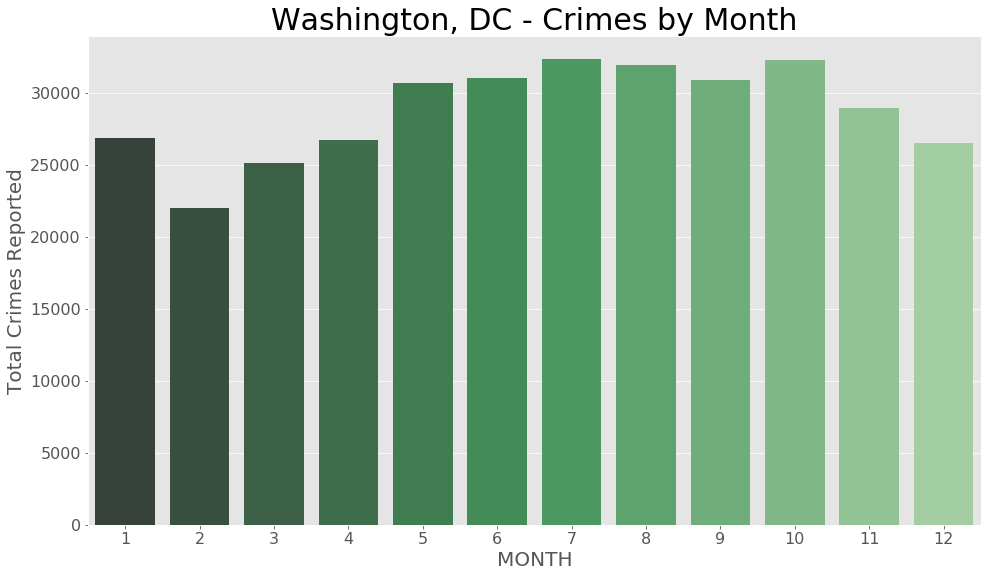

In [20]:
# Plot total count of crimes by month

plt.figure(figsize=(16,9))
sns.countplot(DC_crimes.MONTH, palette ="Greens_d")
plt.title('Washington, DC - Crimes by Month', fontsize=30)
plt.ylabel('Total Crimes Reported',fontsize=20)
plt.xlabel('MONTH',fontsize=20)

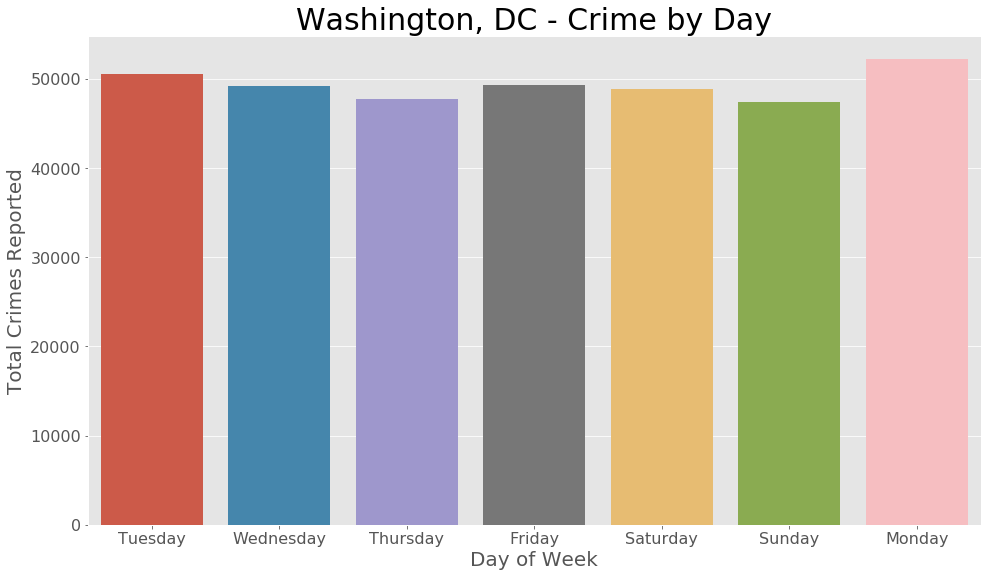

In [24]:
# plot crimes by WEEKDAY

plt.figure(figsize=(16,9))
sns.countplot(DC_crimes.WEEK_DAY)
plt.title('Washington, DC - Crime by Day', fontsize=30)
plt.ylabel('Total Crimes Reported',fontsize=20)
plt.xlabel('Day of Week',fontsize=20)

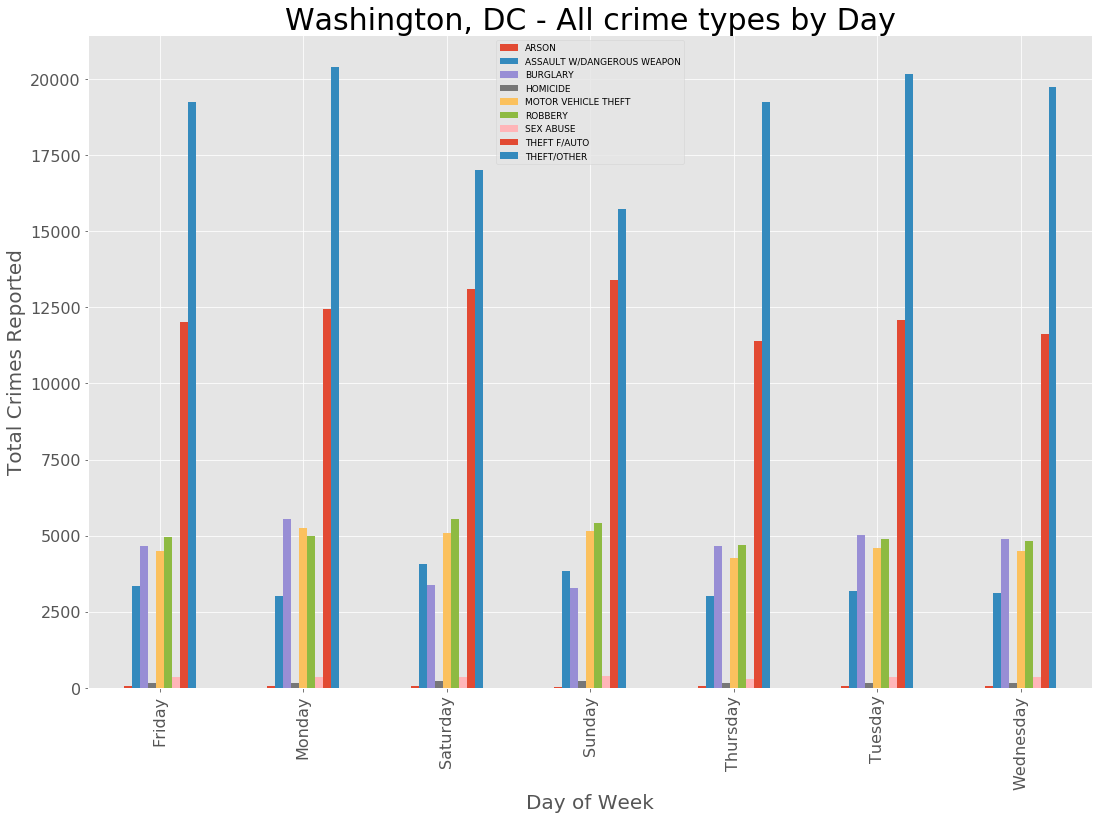

In [41]:
# Plot all crime types by each day

abc = DC_crimes.groupby(["WEEK_DAY","OFFENSE"]).count().iloc[:,:1].unstack()
abc.columns = abc.columns.droplevel(0)
abc.plot(kind='bar',figsize = (18,12))
plt.title('Washington, DC - All crime types by Day', fontsize=30)
plt.ylabel('Total Crimes Reported',fontsize=20)
plt.xlabel('Day of Week',fontsize=20)
plt.legend(loc="best",fontsize=9)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [32]:
#create a new dataframe called "crime_shifts" that counts the number of crimes by each shift, per year

DC_crime_shifts = pd.DataFrame()

DC_crime_shifts['2008'] = crime2008.SHIFT.value_counts()
DC_crime_shifts['2009'] = crime2009.SHIFT.value_counts()
DC_crime_shifts['2010'] = crime2010.SHIFT.value_counts()
DC_crime_shifts['2011'] = crime2011.SHIFT.value_counts()
DC_crime_shifts['2012'] = crime2012.SHIFT.value_counts()
DC_crime_shifts['2013'] = crime2013.SHIFT.value_counts()
DC_crime_shifts['2014'] = crime2014.SHIFT.value_counts()
DC_crime_shifts['2015'] = crime2015.SHIFT.value_counts()
DC_crime_shifts['2016'] = crime2016.SHIFT.value_counts()
DC_crime_shifts['2017'] = crime2017.SHIFT.value_counts()

DC_crime_shifts

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
EVENING,14181,12986,13567,14115,14472,15041,16162,16238,16677,13124
DAY,12995,11979,12077,12907,14559,14298,15490,14032,13025,11479
MIDNIGHT,7004,6215,5937,6191,6243,6517,6756,7010,7498,6488


In [33]:
DC_nw = DC_crime_shifts.sum(axis=1)
DC_nw

EVENING     146563
DAY         132841
MIDNIGHT     65859
dtype: int64

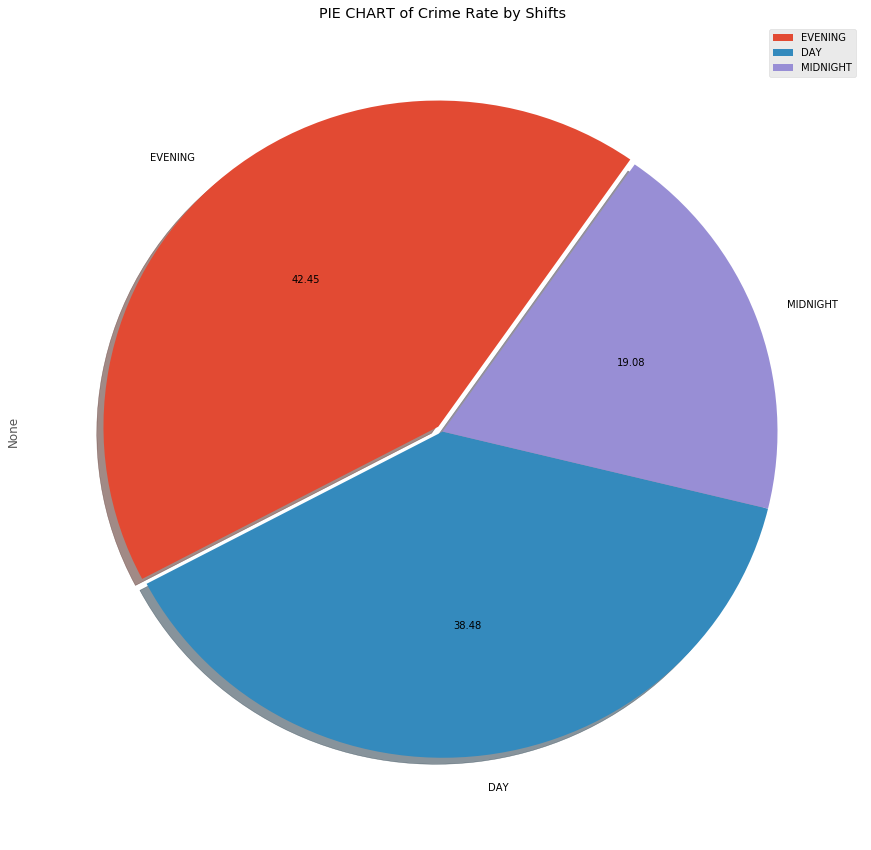

In [34]:
# Plot Pie chart for Crime Rate by Shifts

plt.figure(figsize=(15,15))
explode=(0.02,0.0,0.0)
DC_nw.plot(kind='pie',labeldistance=1.1, startangle=55,
                              fontsize=10,autopct='%.2f', legend=True, 
                              shadow=True, explode=explode)
plt.title('PIE CHART of Crime Rate by Shifts')

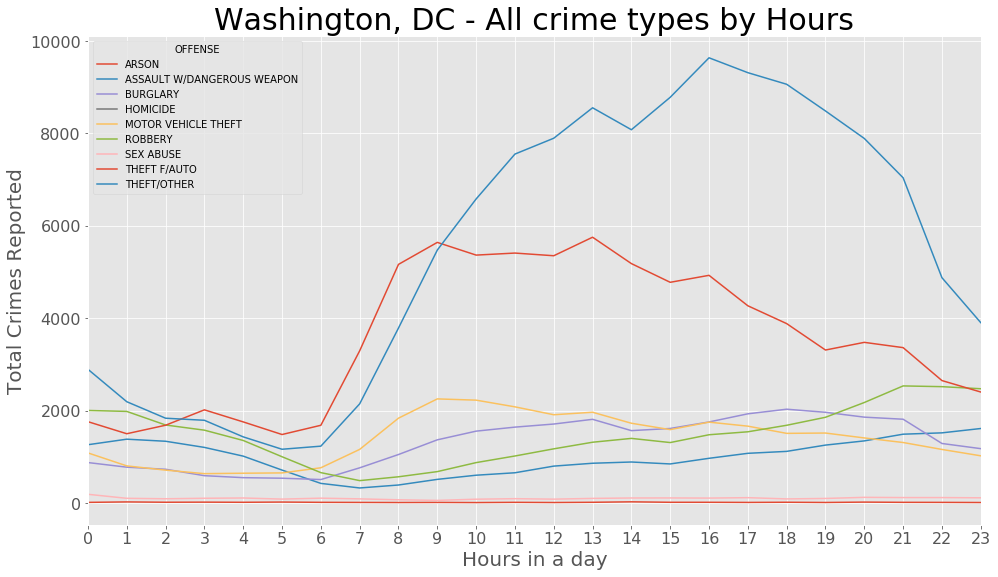

In [31]:
# Plotting All Crime types by hours

times = DC_crimes["TIME"]
hour_offense = DC_crimes.groupby(["HOUR", "OFFENSE"]).count()
hour_offense = hour_offense.iloc[:,:1]
hour_offense['REPORT_DAT'].unstack().plot(figsize = (16,9),title="Crimes every Hour", xticks =range(0,24))
plt.title('Washington, DC - All crime types by Hours', fontsize=30)
plt.ylabel('Total Crimes Reported',fontsize=20)
plt.xlabel('Hours in a day',fontsize=20)
plt.show()

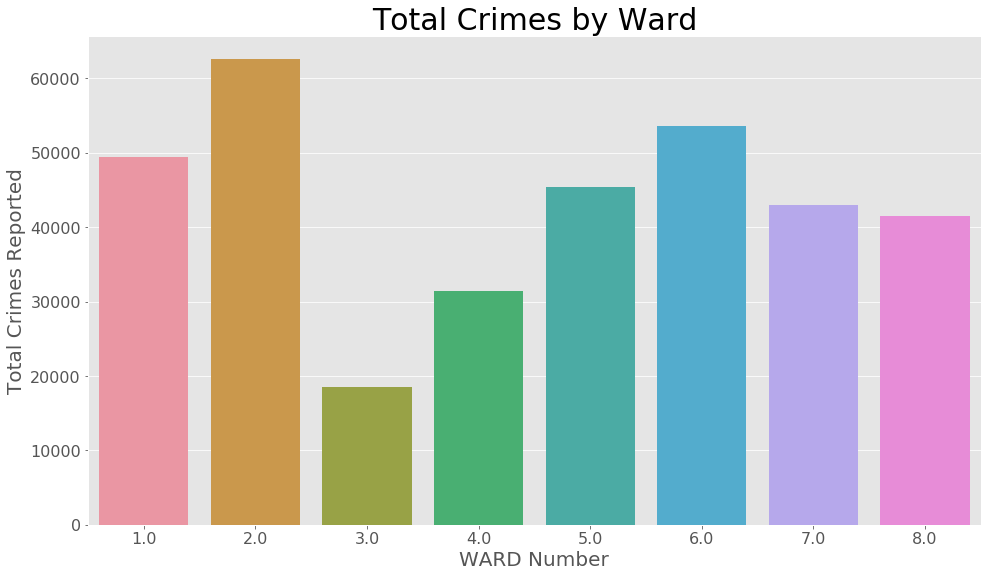

In [35]:
# Plotting Total crimes by Wards

plt.figure(figsize=(16,9))
sns.countplot(DC_crimes.WARD)
plt.title('Total Crimes by Ward', fontsize=30)
plt.ylabel('Total Crimes Reported',fontsize=20)
plt.xlabel('WARD Number',fontsize=20)

In [36]:
#set the index of the new dataframe to be the "REPORTDATETIME" column

DC_crimes.set_index('REPORT_DAT',inplace=True)
col = ["NEIGHBORHOOD_CLUSTER"]
for i in col:
    DC_crimes[i] = DC_crimes[i].astype(str).str[8:]
    DC_crimes[i] = pd.to_numeric(DC_crimes[i])

In [37]:
# Replacing the values in Neighborhood column by cluster found at http://neighborhoodinfodc.org/nclusters/nclusters.html

DC_crimes.NEIGHBORHOOD_CLUSTER.replace(to_replace=[1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,
                                                  16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,
                                                  30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0],
                                       value=['Kalorama Heights, Adams Morgan, Lanier Heights', 
                                              'Columbia Heights, Mt. Pleasant, Pleasant Plains, Park View',
                                              'Howard University, Le Droit Park, Cardozo/Shaw',
                                              'Georgetown, Burleith/Hillandale',
                                              'West End, Foggy Bottom, GWU',
                                              'Dupont Circle, Connecticut Avenue/K Street',
                                              'Shaw, Logan Circle',
                                              'Downtown, Chinatown, Penn Quarters, Mount Vernon Square, North Capitol Street',
                                              'Southwest Employment Area, Southwest/Waterfront, Fort McNair, Buzzard Point',
                                              'Hawthorne, Barnaby Woods, Chevy Chase',
                                              'Friendship Heights, American University Park, Tenleytown',
                                              'North Cleveland Park, Forest Hills, Van Ness',
                                              'Spring Valley, Palisades, Wesley Heights, Foxhall Crescent, Foxhall Village, Georgetown Reservoir',
                                              'Cathedral Heights, McLean Gardens, Glover Park',
                                              'Cleveland Park, Woodley Park, Massachusetts Avenue Heights, Woodland-Normanstone Terrace',
                                              'Colonial Village, Shepherd Park, North Portal Estates',
                                              'Takoma, Brightwood, Manor Park',
                                              'Brightwood Park, Crestwood, Petworth',
                                              'Lamond Riggs, Queens Chapel, Fort Totten, Pleasant Hill',
                                              'North Michigan Park, Michigan Park, University Heights',
                                              'Edgewood, Bloomingdale, Truxton Circle, Eckington',
                                              'Brookland, Brentwood, Langdon',
                                              'Ivy City, Arboretum, Trinidad, Carver Langston',
                                              'Woodridge, Fort Lincoln, Gateway',
                                              'NoMa, Union Station, Stanton Park, Kingman Park',
                                              'Capitol Hill, Lincoln Park',
                                              'Near Southeast, Navy Yard',
                                              'Historic Anacostia',
                                              'Eastland Gardens, Kenilworth',
                                              'Mayfair, Hillbrook, Mahaning Heights',
                                              'Deanwood, Burrville, Grant Park, Lincoln Heights, Fairmont Heights',
                                              'River Terrace, Benning, Greenway, Fort Dupont',
                                              'Capitol View, Marshall Heights, Benning Heights',
                                              'Twining, Fairlawn, Randle Highlands, Penn Branch, Fort Davis Park, Dupont Park',
                                              'Fairfax Village, Naylor Gardens, Hillcrest, Summit Park',
                                              'Woodland/Fort Stanton, Garfield Heights, Knox Hill',
                                              'Sheridan, Barry Farm, Buena Vista',
                                              'Douglass, Shipley Terrace',
                                              'Congress Heights, Bellevue, Washington Highlands'],inplace=True)

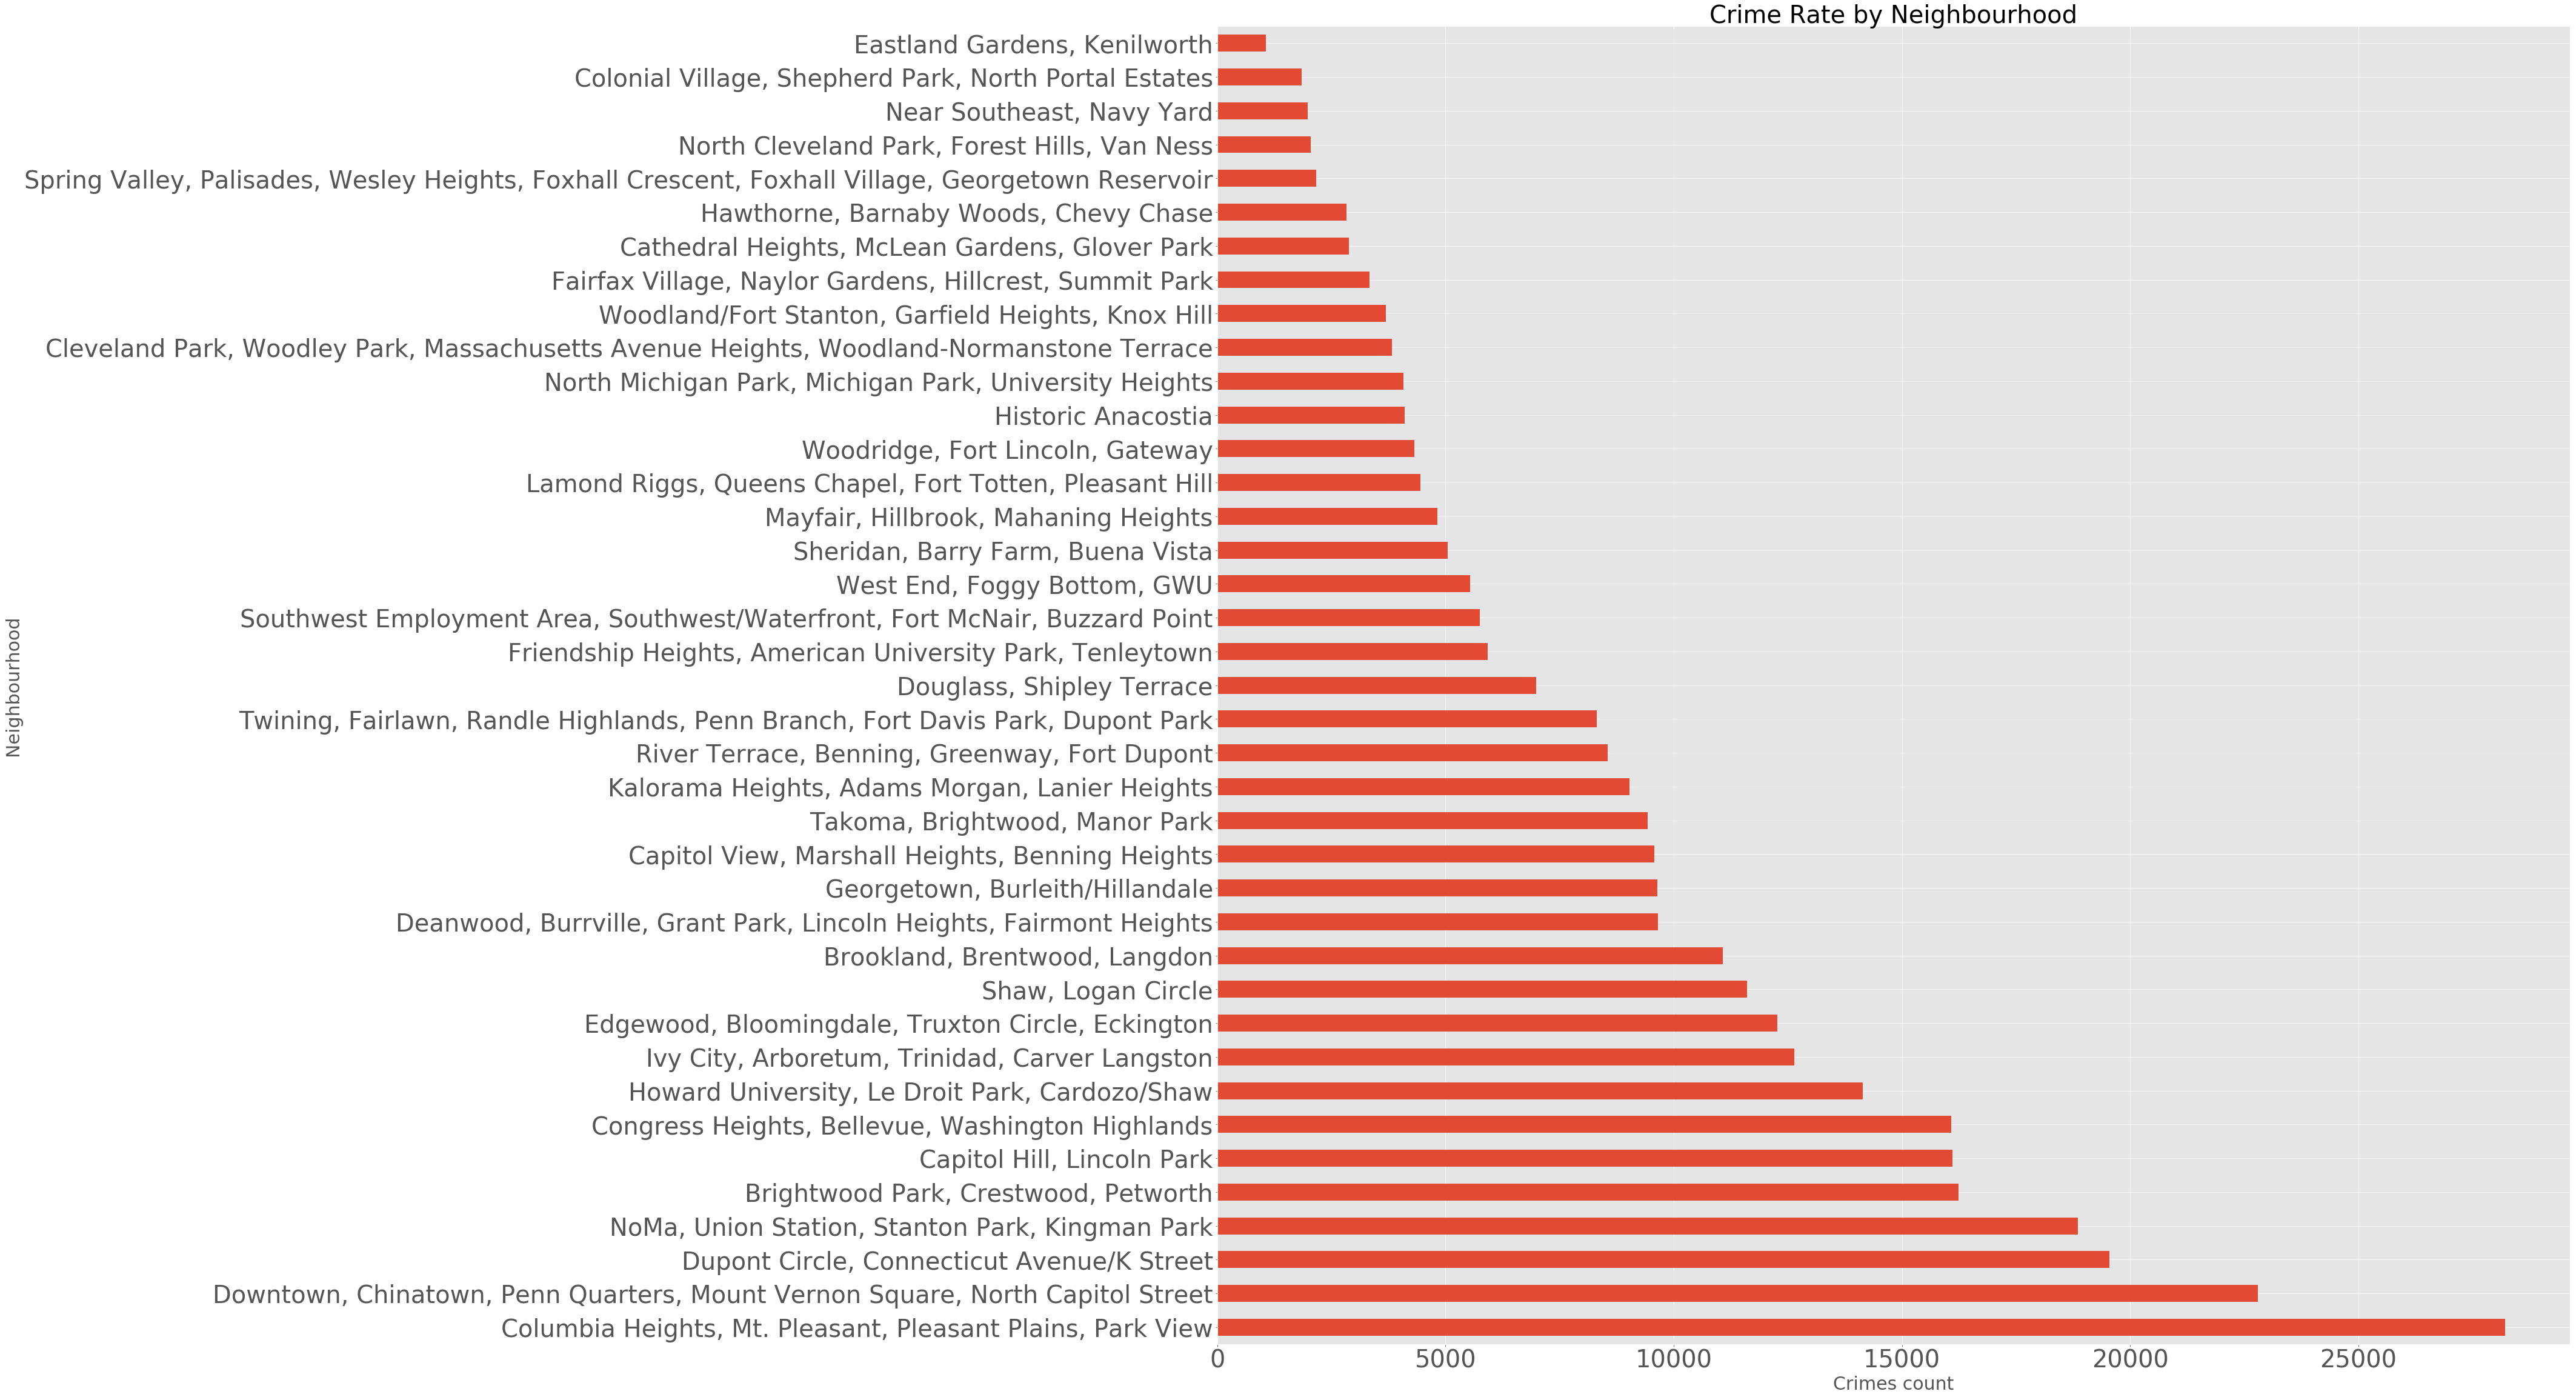

In [38]:
# Plotting Crime rate by neighbourhoods

DC_crimes.NEIGHBORHOOD_CLUSTER.value_counts().plot(kind='barh',figsize=(40,40),fontsize=40)
plt.title('Crime Rate by Neighbourhood', fontsize = 40)
plt.ylabel('Neighbourhood',fontsize=30)
plt.xlabel('Crimes count',fontsize=30)